In [1]:
import os
import pandas as pd
os.chdir(os.getcwd() + "/../")

In [2]:
from data_cofig import data_config

#### 1） Read Train Data

In [3]:
train_df = pd.read_csv(data_config.train_data_path,sep="\t")

In [4]:
train_df.head()

,quality,#1 string,#2 string
0,1,amrozi accused his brother whom he called the ...,referring to him as only the witness amrozi ac...
1,0,yucaipa owned dominicks before selling the cha...,yucaipa bought dominicks in 1995 for $693 mill...
2,1,they had published an advertisement on the int...,on june 10 the ships owners had published an a...
3,0,around 0335 gmt tab shares were up 19 cents or...,tab shares jumped 20 cents or 4.6% to set a re...
4,1,the stock rose $2.11 or about 11 percent to cl...,pg&e corp. shares jumped $1.63 or 8 percent to...


In [5]:
text_1 = train_df['#1 string']

text_2 = train_df['#2 string']

#### 2） Preprocess

In [6]:
from utils import clean_text,remove_stopwords,tokenize
import numpy as np

from corpus import word2vec_path

from text_processor import TextPreprocessor

pipeline = [clean_text,remove_stopwords,tokenize]

padding_config = {'padding': 'post',
'truncating': 'post',
'padding value': 'eos'}

token2id  = False

text_preprocessor = TextPreprocessor(pipeline = pipeline,
                                     padding_config = padding_config,
                                     token2id = token2id,
                                     word2vec_path = word2vec_path)

In [10]:
text_list_1 = train_df['#1 string']

In [11]:
text_list_2 = train_df['#2 string']

In [15]:
feature_input_1 = text_preprocessor.transform(text_list_1)

In [18]:
feature_input_1.shape

(4076, 27, 300)

In [16]:
feature_input_2 = text_preprocessor.transform(text_list_2)

In [17]:
feature_input_2.shape

(4076, 25, 300)

In [36]:
max_seq_len = max(feature_input_1.shape[1],feature_input_2.shape[1],)

In [24]:
# import tensorflow_datasets as tfds
import tensorflow as tf

import time
import numpy as np
import matplotlib.pyplot as plt

In [25]:
def get_angles(pos, i, d_model):
    angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
    return pos * angle_rates

In [26]:
def positional_encoding(position, d_model):
    angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                          np.arange(d_model)[np.newaxis, :],
                          d_model)

    # 将 sin 应用于数组中的偶数索引（indices）；2i
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])

    # 将 cos 应用于数组中的奇数索引；2i+1
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

    pos_encoding = angle_rads[np.newaxis, ...]

    return tf.cast(pos_encoding, dtype=tf.float32)

(1, 27, 300)


Text(0.5, 0, 'Depth')

(0.0, 300.0)

Text(0, 0.5, 'Position')

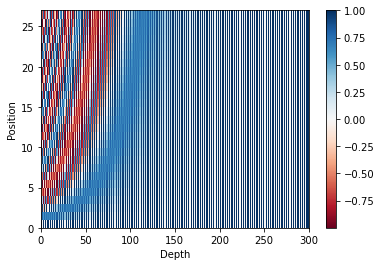

In [41]:
pos_encoding = positional_encoding(max_seq_len, 300)
print (pos_encoding.shape)

plt.pcolormesh(pos_encoding[0], cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, 300))
plt.ylabel('Position')
plt.colorbar()
plt.show()

In [40]:
x = feature_input_1[:64]

In [42]:
x.shape

(64, 27, 300)

In [43]:
seq_len = tf.shape(x)[1]

In [44]:
x += pos_encoding[:, :seq_len, :]